In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def is_pareto_efficient(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

In [3]:
def plot_pareto_front(data, df1, df2, name):

    fig, ax = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(8)
    data['observed_time'] = data['observed_time']/1000
    data['predicted_time'] = data['predicted_time']/1000
    # print(data)
    df1['observed_time'] = df1['observed_time']/1000
    df1['predicted_time'] = df1['predicted_time']/1000
    # Extract the relevant data
    x_obs = data['observed_power']
    y_obs = data['observed_time']
    x_pred = data['predicted_power']
    y_pred = data['predicted_time']

    x_nn_pred = df1['predicted_power']
    y_nn_pred = df1['predicted_time']

    x_anal_pred = df2['predicted_power']
    y_anal_pred = df2['predicted_time']


    # Find pareto points
    pareto_efficient_obs = is_pareto_efficient(np.array([x_obs, y_obs]).T)
    pareto_efficient_pred = is_pareto_efficient(np.array([x_pred, y_pred]).T)
    pareto_efficient_nn_pred = is_pareto_efficient(np.array([x_nn_pred, y_nn_pred]).T)
    pareto_efficient_anal_pred = is_pareto_efficient(np.array([x_anal_pred, y_anal_pred]).T)
    
    # Extract Pareto points
    pareto_data_obs = data[pareto_efficient_obs]
    pareto_x_obs = pareto_data_obs['observed_power']
    pareto_y_obs = pareto_data_obs['observed_time']

    pareto_data_pred = data[pareto_efficient_pred]
    # print(pareto_data_pred.columns)
    pareto_x_pred = pareto_data_pred['predicted_power']
    pareto_y_pred = pareto_data_pred['predicted_time']
    pareto_x_pred_obs = pareto_data_pred['observed_power']
    pareto_y_pred_obs = pareto_data_pred['observed_time']

    pareto_data_nn_pred = df1[pareto_efficient_nn_pred]
    pareto_x_nn_pred = pareto_data_nn_pred['predicted_power']
    pareto_y_nn_pred = pareto_data_nn_pred['predicted_time']
    pareto_x_nn_pred_obs = pareto_data_nn_pred['observed_power']
    pareto_y_nn_pred_obs = pareto_data_nn_pred['observed_time']

    pareto_data_anal_pred = df2[pareto_efficient_anal_pred]
    # Create column powermode which combines the cores, cpu, gpu, mem with underscore
    pareto_data_anal_pred['powermode'] = pareto_data_anal_pred['cores'].astype(str) + '_' + pareto_data_anal_pred['cpu'].astype(str) + '_' + pareto_data_anal_pred['gpu'].astype(str) + '_' + pareto_data_anal_pred['mem'].astype(str)
    # print(pareto_data_anal_pred)
    pareto_data_anal_powermode = pareto_data_anal_pred['powermode'].tolist()

    # print(pareto_data_anal_pred)
    pareto_x_anal_pred = pareto_data_anal_pred['predicted_power']
    pareto_y_anal_pred = pareto_data_anal_pred['predicted_time']

    # Filter data to only include the power modes of the Pareto points
    data_filtered = data[data['powermode'].isin(pareto_data_anal_powermode)]
    # print(pareto_data_anal_powermode)
    pareto_x_anal_pred_obs = data_filtered['observed_power']
    pareto_y_anal_pred_obs = data_filtered['observed_time']

    
    # Sort Pareto points by x-values (Energy)
    sorted_indices_obs = np.argsort(pareto_x_obs)
    sorted_pareto_x_obs = pareto_x_obs.iloc[sorted_indices_obs].values
    sorted_pareto_y_obs = pareto_y_obs.iloc[sorted_indices_obs].values

    sorted_indices_pred = np.argsort(pareto_x_pred)
    sorted_pareto_x_pred = pareto_x_pred.iloc[sorted_indices_pred].values
    sorted_pareto_y_pred = pareto_y_pred.iloc[sorted_indices_pred].values

    sorted_indices_pred_obs = np.argsort(pareto_x_pred_obs)
    sorted_pareto_x_pred_obs = pareto_x_pred_obs.iloc[sorted_indices_pred_obs].values
    sorted_pareto_y_pred_obs = pareto_y_pred_obs.iloc[sorted_indices_pred_obs].values

    sorted_indices_nn_pred = np.argsort(pareto_x_nn_pred)
    sorted_pareto_x_nn_pred = pareto_x_nn_pred.iloc[sorted_indices_nn_pred].values
    sorted_pareto_y_nn_pred = pareto_y_nn_pred.iloc[sorted_indices_nn_pred].values

    sorted_indices_nn_pred_obs = np.argsort(pareto_x_nn_pred_obs)
    sorted_pareto_x_nn_pred_obs = pareto_x_nn_pred_obs.iloc[sorted_indices_nn_pred_obs].values
    sorted_pareto_y_nn_pred_obs = pareto_y_nn_pred_obs.iloc[sorted_indices_nn_pred_obs].values

    sorted_indices_anal_pred = np.argsort(pareto_x_anal_pred)
    sorted_pareto_x_anal_pred = pareto_x_anal_pred.iloc[sorted_indices_anal_pred].values
    sorted_pareto_y_anal_pred = pareto_y_anal_pred.iloc[sorted_indices_anal_pred].values

    sorted_indices_anal_pred_obs = np.argsort(pareto_x_anal_pred_obs)
    sorted_pareto_x_anal_pred_obs = pareto_x_anal_pred_obs.iloc[sorted_indices_anal_pred_obs].values
    sorted_pareto_y_anal_pred_obs = pareto_y_anal_pred_obs.iloc[sorted_indices_anal_pred_obs].values


    # Set minor gridlines
    plt.minorticks_on()
    ax.yaxis.grid(which="minor", linestyle="--", linewidth=0.25, color="lightgrey")
    ax.yaxis.grid(which="major", linestyle="-", linewidth=0.25, color="grey")
    ax.xaxis.grid(which="major", linestyle="-", linewidth=0.25, color="grey")
    ax.xaxis.grid(which="minor", linestyle="--", linewidth=0.25, color="lightgrey")
    ax.set_axisbelow(True)




    # Create a scatter plot
    # ax.figure(figsize=(10, 6))

    # ax.scatter(x_obs, y_obs, s=2, label='Observed points', color='#FF6EC7')

    # ax.scatter(x_pred, y_pred, s=2, label='Predicted points', color='#94E5FF')

    # ax.scatter(sorted_pareto_x_obs, sorted_pareto_y_obs, color='#D21404', s=2, label='Obs Pareto points')

    ax.plot(sorted_pareto_x_obs, sorted_pareto_y_obs, color='#D21404', label='Obs Pareto', alpha=1)

    # ax.scatter(sorted_pareto_x_pred, sorted_pareto_y_pred, color='blue', s=2, label='Pred Pareto points')

    ax.plot(sorted_pareto_x_pred, sorted_pareto_y_pred, color='#e36668', label='PT Pred Pareto', alpha=0.6, linestyle='--')

    # ax.scatter(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='green', s=2, label='Pred Obs Pareto points')

    ax.plot(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='#e36668', label='PT Obs Pareto', alpha=0.6)

    ax.plot(sorted_pareto_x_nn_pred, sorted_pareto_y_nn_pred, color='#fadc6f', label='NN Pred Pareto', alpha=0.8, linestyle='--')

    ax.plot(sorted_pareto_x_nn_pred_obs, sorted_pareto_y_nn_pred_obs, color='#fadc6f', label='NN Obs Pareto', alpha=0.8)

    ax.plot(sorted_pareto_x_anal_pred, sorted_pareto_y_anal_pred, color='#fb9a3c', label='ANL Pred Pareto', alpha=0.8, linestyle='--')

    ax.plot(sorted_pareto_x_anal_pred_obs, sorted_pareto_y_anal_pred_obs, color='#fb9a3c', label='ANL Obs Pareto', alpha=0.8)

    # for i in range(0,len(sorted_pareto_x_pred)):
    #     ax.plot([sorted_pareto_x_pred[i], sorted_pareto_x_pred_obs[i]], [sorted_pareto_y_pred[i], sorted_pareto_y_pred_obs[i]], color='black', alpha=0.6)

    if name == 'YOLO':
        ax.set_xlim(0, 35)
        ax.set_ylim(0, 5000)

    elif name == 'Resnet':
        ax.set_xlim(0, 55)
        ax.set_ylim(0, 7000)

    else:
        ax.set_xlim(0, 45)
        ax.set_ylim(0, 5000)

    ax.tick_params(axis='both', which='major', labelsize=26)
    
    # Adjust axis limits to zoom in on the region of Pareto points
    # plt.xlim(sorted_pareto_x.min() * 0.95, sorted_pareto_x.max() * 1.05)
    # plt.ylim(sorted_pareto_y.min() * 0.95, sorted_pareto_y.max() * 1.05)
    ax.set_xlabel('Power (W)', fontsize = 28)
    ax.set_yticklabels(range(0,10))
    ax.set_ylabel('Time (1000s of secs)', fontsize = 28)

    plt.legend(fontsize=18)

    # plt.title('Scatter plot of Power vs Time with Pareto front')

    plt.grid(True)
    plt.savefig('ParetoMultiLine_'+name+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
    plt.show()

    # Save the corresponding power modes of the Pareto points to a csv
    # pareto_powermodes_obs = 'resnet_pareto_powermodes_obs_new.csv'
    # pareto_powermodes_pred = 'resnet_pareto_powermodes_pred_new.csv'  
    # pareto_data_obs[['powermode','predicted_time','predicted_power','observed_time','observed_power']].to_csv(pareto_powermodes_obs, index=False)
    # pareto_data_pred[['powermode','predicted_time','predicted_power','observed_time','observed_power']].to_csv(pareto_powermodes_pred, index=False)

    # obs = pd.read_csv("resnet_pareto_powermodes_obs_new.csv")
    # pred = pd.read_csv("resnet_pareto_powermodes_obs_new.csv")


In [4]:
# name = 'YOLO'
# data = pd.read_csv("merged_observed_predicted_yolo_new.csv")
# # dtest = pd.read_csv("pareto_powermodes_obs_resnet_new.csv")
# df1 = pd.read_csv("YOLO_pareto_powermodes_pred_new.csv")
# df2 = pd.read_csv("yolo_resnet_TL_curvefit_merged_observed_predicted.csv")

In [5]:
# name = 'Resnet'
# data = pd.read_csv("merged_observed_predicted_resnet_new.csv")
# # dtest = pd.read_csv("pareto_powermodes_obs_resnet_new.csv")
# df1 = pd.read_csv("resnet_pareto_powermodes_pred_new.csv")
# df2 = pd.read_csv("resnet_resnet_TL_curvefit_merged_observed_predicted.csv")

In [6]:
name = 'Mobnet'
data = pd.read_csv("merged_observed_predicted_mobnet_new.csv")
# dtest = pd.read_csv("pareto_powermodes_obs_resnet_new.csv")
df1 = pd.read_csv("mobnet_pareto_powermodes_pred_new.csv")
df2 = pd.read_csv("mobnet_resnet_TL_curvefit_merged_observed_predicted.csv")

C:\Users\Kedar Dhule\AppData\Local\Temp\ipykernel_29112\1754101319.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pareto_data_anal_pred['powermode'] = pareto_data_anal_pred['cores'].astype(str) + '_' + pareto_data_anal_pred['cpu'].astype(str) + '_' + pareto_data_anal_pred['gpu'].astype(str) + '_' + pareto_data_anal_pred['mem'].astype(str)
C:\Users\Kedar Dhule\AppData\Local\Temp\ipykernel_29112\1754101319.py:140: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(0,10))


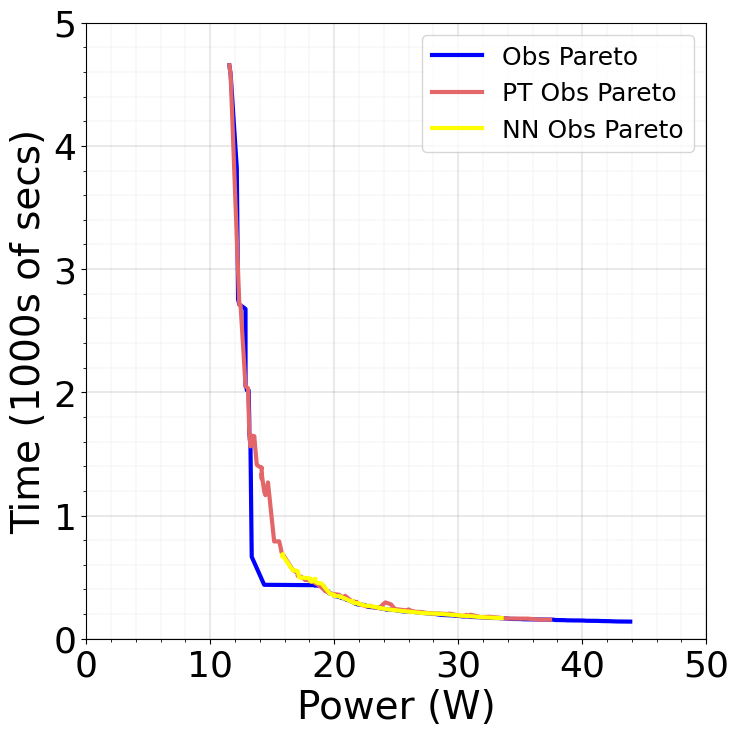

In [7]:
def plot_pareto_front(data, df1, df2, name):
    fig, ax = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(8)
    data['observed_time'] = data['observed_time']/1000
    data['predicted_time'] = data['predicted_time']/1000
    # print(data)
    # df1['observed_time'] = df1['observed_time']/1000
    # df1['predicted_time'] = df1['predicted_time']/1000
    # Extract the relevant data
    x_obs = data['observed_power']
    y_obs = data['observed_time']
    x_pred = data['predicted_power']
    y_pred = data['predicted_time']

    x_nn_pred = df1['predicted_power']
    y_nn_pred = df1['predicted_time']

    x_anal_pred = df2['predicted_power']
    y_anal_pred = df2['predicted_time']


    # Find pareto points
    pareto_efficient_obs = is_pareto_efficient(np.array([x_obs, y_obs]).T)
    pareto_efficient_pred = is_pareto_efficient(np.array([x_pred, y_pred]).T)
    pareto_efficient_nn_pred = is_pareto_efficient(np.array([x_nn_pred, y_nn_pred]).T)
    pareto_efficient_anal_pred = is_pareto_efficient(np.array([x_anal_pred, y_anal_pred]).T)
    
    # Extract Pareto points
    pareto_data_obs = data[pareto_efficient_obs]
    pareto_x_obs = pareto_data_obs['observed_power']
    pareto_y_obs = pareto_data_obs['observed_time']

    pareto_data_pred = data[pareto_efficient_pred]
    # print(pareto_data_pred.columns)
    pareto_x_pred = pareto_data_pred['predicted_power']
    pareto_y_pred = pareto_data_pred['predicted_time']
    pareto_x_pred_obs = pareto_data_pred['observed_power']
    pareto_y_pred_obs = pareto_data_pred['observed_time']

    pareto_data_nn_pred = df1[pareto_efficient_nn_pred]
    pareto_x_nn_pred = pareto_data_nn_pred['predicted_power']
    pareto_y_nn_pred = pareto_data_nn_pred['predicted_time']
    pareto_x_nn_pred_obs = pareto_data_nn_pred['observed_power']
    pareto_y_nn_pred_obs = pareto_data_nn_pred['observed_time']

    pareto_data_anal_pred = df2[pareto_efficient_anal_pred]
    # Create column powermode which combines the cores, cpu, gpu, mem with underscore
    pareto_data_anal_pred['powermode'] = pareto_data_anal_pred['cores'].astype(str) + '_' + pareto_data_anal_pred['cpu'].astype(str) + '_' + pareto_data_anal_pred['gpu'].astype(str) + '_' + pareto_data_anal_pred['mem'].astype(str)
    # print(pareto_data_anal_pred)
    pareto_data_anal_powermode = pareto_data_anal_pred['powermode'].tolist()

    # print(pareto_data_anal_pred)
    pareto_x_anal_pred = pareto_data_anal_pred['predicted_power']
    pareto_y_anal_pred = pareto_data_anal_pred['predicted_time']

    # Filter data to only include the power modes of the Pareto points
    data_filtered = data[data['powermode'].isin(pareto_data_anal_powermode)]
    # print(pareto_data_anal_powermode)
    pareto_x_anal_pred_obs = data_filtered['observed_power']
    pareto_y_anal_pred_obs = data_filtered['observed_time']

    
    # Sort Pareto points by x-values (Energy)
    sorted_indices_obs = np.argsort(pareto_x_obs)
    sorted_pareto_x_obs = pareto_x_obs.iloc[sorted_indices_obs].values
    sorted_pareto_y_obs = pareto_y_obs.iloc[sorted_indices_obs].values

    sorted_indices_pred = np.argsort(pareto_x_pred)
    sorted_pareto_x_pred = pareto_x_pred.iloc[sorted_indices_pred].values
    sorted_pareto_y_pred = pareto_y_pred.iloc[sorted_indices_pred].values

    sorted_indices_pred_obs = np.argsort(pareto_x_pred_obs)
    sorted_pareto_x_pred_obs = pareto_x_pred_obs.iloc[sorted_indices_pred_obs].values
    sorted_pareto_y_pred_obs = pareto_y_pred_obs.iloc[sorted_indices_pred_obs].values

    sorted_indices_nn_pred = np.argsort(pareto_x_nn_pred)
    sorted_pareto_x_nn_pred = pareto_x_nn_pred.iloc[sorted_indices_nn_pred].values
    sorted_pareto_y_nn_pred = pareto_y_nn_pred.iloc[sorted_indices_nn_pred].values

    sorted_indices_nn_pred_obs = np.argsort(pareto_x_nn_pred_obs)
    sorted_pareto_x_nn_pred_obs = pareto_x_nn_pred_obs.iloc[sorted_indices_nn_pred_obs].values
    sorted_pareto_y_nn_pred_obs = pareto_y_nn_pred_obs.iloc[sorted_indices_nn_pred_obs].values

    sorted_indices_anal_pred = np.argsort(pareto_x_anal_pred)
    sorted_pareto_x_anal_pred = pareto_x_anal_pred.iloc[sorted_indices_anal_pred].values
    sorted_pareto_y_anal_pred = pareto_y_anal_pred.iloc[sorted_indices_anal_pred].values

    sorted_indices_anal_pred_obs = np.argsort(pareto_x_anal_pred_obs)
    sorted_pareto_x_anal_pred_obs = pareto_x_anal_pred_obs.iloc[sorted_indices_anal_pred_obs].values
    sorted_pareto_y_anal_pred_obs = pareto_y_anal_pred_obs.iloc[sorted_indices_anal_pred_obs].values


    # Set minor gridlines
    plt.minorticks_on()
    ax.yaxis.grid(which="minor", linestyle="--", linewidth=0.25, color="lightgrey")
    ax.yaxis.grid(which="major", linestyle="-", linewidth=0.25, color="grey")
    ax.xaxis.grid(which="major", linestyle="-", linewidth=0.25, color="grey")
    ax.xaxis.grid(which="minor", linestyle="--", linewidth=0.25, color="lightgrey")
    ax.set_axisbelow(True)

    # Create a scatter plot
    # ax.plot(sorted_pareto_x_obs, sorted_pareto_y_obs, color='#D21404', label='Obs Pareto', alpha=1)
    ax.plot(sorted_pareto_x_obs, sorted_pareto_y_obs, color='blue', label='Obs Pareto', alpha=1, linewidth=3)
    
    # ax.plot(sorted_pareto_x_pred, sorted_pareto_y_pred, color='#e36668', label='PT Pred Pareto', alpha=0.6, linestyle='--')
    
    # ax.plot(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='#e36668', label='PT Obs Pareto', alpha=0.8)
    ax.plot(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='#e36668', label='PT Obs Pareto', alpha=1, linewidth=3)

    # ax.plot(sorted_pareto_x_nn_pred, sorted_pareto_y_nn_pred, color='#fadc6f', label='NN Pred Pareto', alpha=0.8, linestyle='--')
    # ax.plot(sorted_pareto_x_pred_obs, sorted_pareto_y_pred_obs, color='black', label='_nolegend_', alpha=0.2, linewidth=3)


    # Plot black outline for "NN Obs Pareto" line
    # ax.plot(sorted_pareto_x_nn_pred_obs, sorted_pareto_y_nn_pred_obs, color='black', label='_nolegend_', alpha=0.4, linewidth=3)

    # Plot the actual line on top of the black outline
    # ax.plot(sorted_pareto_x_nn_pred_obs, sorted_pareto_y_nn_pred_obs, color='#fadc6f', label='NN Obs Pareto', alpha=0.8, linewidth=2)
    ax.plot(sorted_pareto_x_nn_pred_obs, sorted_pareto_y_nn_pred_obs, color='yellow', label='NN Obs Pareto', alpha=1, linewidth=3)
    
    # ax.plot(sorted_pareto_x_anal_pred, sorted_pareto_y_anal_pred, color='#fb9a3c', label='ANL Pred Pareto', alpha=0.8, linestyle='--')
    # ax.plot(sorted_pareto_x_anal_pred_obs, sorted_pareto_y_anal_pred_obs, color='#fb9a3c', label='ANL Obs Pareto', alpha=0.8)


    if name == 'YOLO':
        ax.set_xlim(0, 35)
        ax.set_ylim(0, 5000)

    elif name == 'Resnet':
        ax.set_xlim(0, 55)
        ax.set_ylim(0, 7000)
        
    else:
        ax.set_xlim(0, 45)
        ax.set_ylim(0, 5000)

    ax.tick_params(axis='both', which='major', labelsize=26)
    ax.set_xlabel('Power (W)', fontsize = 28)
    ax.set_yticklabels(range(0,10))
    ax.set_ylabel('Time (1000s of secs)', fontsize = 28)
    ax.set_xticks([0, 10, 20, 30, 40, 50])

    plt.legend(fontsize=18)
    plt.grid(True)
    plt.savefig('ParetoMultiLine_'+name+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
    plt.show()

plot_pareto_front(data, df1, df2,name)

In [8]:
data

,powermode,observed_time,observed_power,predicted_time,predicted_power
0,2_268800_1300500000_204000000,1638.639637,17.7045,3405.467013,13.686851
1,2_268800_1300500000_2133000000,950.404607,18.6580,3637.072842,16.756154
2,2_268800_1300500000_3199000000,875.025676,19.7600,4117.128639,18.566810
3,2_268800_1300500000_665600000,1087.731419,18.2065,3375.393450,14.268524
4,2_268800_1236750000_204000000,4720.339630,14.4435,3488.921042,13.527113
...,...,...,...,...,...
4363,12_2201600_216750000_665600000,658.080497,18.2570,871.548191,17.748764
4364,12_2201600_114750000_204000000,1612.803088,15.9490,1653.883916,15.451584
4365,12_2201600_114750000_2133000000,1118.645109,17.3570,1159.780514,19.115594
4366,12_2201600_114750000_3199000000,1114.266850,18.1680,1177.319313,21.065408
